<h1>Running Susceptible Infected Recovered (SIR)</h1>

In [1]:
import sys
#add the path were the models are
sys.path.append("../main/")
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from modelos import SIR

#set default theme for plts
theme_set(theme_linedraw())

<h2>How to use</h2>

<p>The easiest way to use SIR model is calling it on three basic information:</p>
<ul>
    <li>The population size</li>
    <li>Days since the first report of infection</li>
    <li>A series with the cummulative number of cases</li>
    </ul>
<p>To ilustrate it we will use the series of covid-19 notified in Sao Paulo, Brazil</p>

In [2]:
data = pd.read_csv("../data/datastate.csv")

#Select only Sao Paulo
sp = data[data["UF"] == 35]
sp.head()

,Unnamed: 0,date,UF,newcases,state,totalcases
0,1,2020-02-25,35,1,São Paulo,1
1,2,2020-02-29,35,1,São Paulo,2
2,3,2020-03-04,35,1,São Paulo,3
5,6,2020-03-05,35,3,São Paulo,6
8,9,2020-03-06,35,4,São Paulo,10


In [3]:
#Start the model with population size
model = SIR(tamanhoPop = 1000000)

In [4]:
#create a series with the cummulative number of cases
y = sp["totalcases"]

#Give the number of days since the day of first case confirmed
x = range(1,len(sp["totalcases"]) + 1)

<p>Than fit the model on data</p>

In [5]:
#fit model using data
model.fit(x = x, y = y)

2020-03-24 18:40:54,237 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=148 
2020-03-24 18:40:55,120 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 148.30187667763644, best pos: [3.45548539 0.28333418]


In [6]:
#Predict the number of cases
sp["predicted"] = model.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#Check the data
sp

,Unnamed: 0,date,UF,newcases,state,totalcases,predicted
0,1,2020-02-25,35,1,São Paulo,1,4.587325
1,2,2020-02-29,35,1,São Paulo,2,6.089898
2,3,2020-03-04,35,1,São Paulo,3,8.084636
5,6,2020-03-05,35,3,São Paulo,6,10.732748
8,9,2020-03-06,35,4,São Paulo,10,14.248246
11,12,2020-03-07,35,3,São Paulo,13,18.915241
15,16,2020-03-08,35,3,São Paulo,16,25.110904
17,18,2020-03-10,35,3,São Paulo,19,33.335949
22,23,2020-03-11,35,26,São Paulo,45,44.255096
29,30,2020-03-12,35,19,São Paulo,64,58.750796


In [8]:
#Projections about the futher could easiyl be done
futherCases = pd.DataFrame.from_dict({"date":pd.date_range(start = "2020-03-19", end = "2020-03-24"),
                                      "type": "Predicted")

In [9]:
#create the new series to be predicted
newX = range(len(y) + 1, len(futherCases) + len(y) + 1)

#make projections
futherCases["totalcases"] = model.predict(newX)

In [10]:
futherCases

,date,totalcases,predicted
0,2020-03-19,NaN,321.600394
1,2020-03-20,NaN,426.940193
2,2020-03-21,NaN,566.783908
3,2020-03-22,NaN,752.433253
4,2020-03-23,NaN,998.891805
5,2020-03-24,NaN,1326.077540


In [11]:
#Create a plot using the information above
#Selecting variables of the first data
sp = sp[["date", "totalcases", "predicted"]]

#Add a column for plot


df = sp.append(futherCases)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


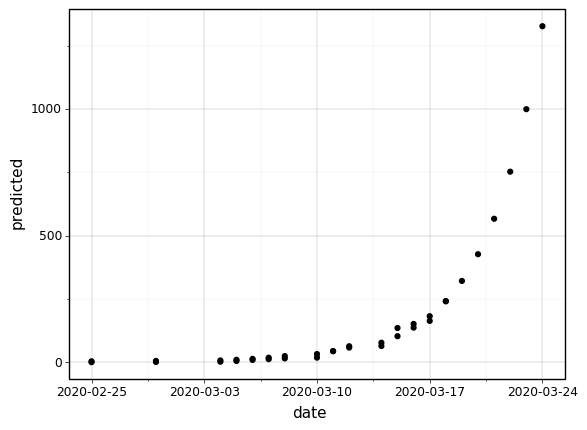

<ggplot: (8778754250153)>

In [17]:
#plot data
(ggplot(df) +
    geom_point(aes(x = "date", y = "predicted")) +
    geom_point(aes(x = "date", y = "totalcases")) +
    scale_x_datetime(breaks = date_breaks('1 weeks')) +
    labs(ggtitle = "Series of covid-19 for Sao Paulo", xlab = None, ylab = "Number of cases"))